<a href="https://colab.research.google.com/github/AuraFrizzati/Applied-Text-Mining-in-Python/blob/main/ATMP_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **2.1: Basic Natural Language Processing (NLP)**

**What is Natural Language?**
- Language is used for everyday communication by humans (compared to artificial computer language)

**What is Natural Language Processing?**
- Any computation, manipulation of natural language
- Natural languages evolve:
  - New words get added
  - Old words lose popularity
  - Meanings of words change
  - Language rules themselves may change

### **NLP tasks: a broad spectrum**
- Counting words, counting frequency of words
- Finding unique words in a corpus
- Finding sentence boundaries
- Part of speech tagging
- Parsing the sentence structure (trying to understand better the grammatical constructs present)
- Identify semantic roles
- **Entity recognition** (i.e. identifying entities in a sentence)
- **Co-reference resolution** (co-ref resolution) (e.g. finding which pronoun refers to which entity)
- ... and many more tasks

The challenge is how to achieve all these tasks in an efficient manner.




## **2.2: Basic NLP tasks with NLTK**

- Counting words, calculating **frequencies of words**
- Finding sentence and word boundaries (**tokenization**)
- **Stemming** and **lemmatization**

### **An introduction to NLTK**
- **NLTK: Natural Language Toolkit**
- Open source library in python
- It supports most of NLP tasks
- It provides access to numerous text corpora

In [1]:
import nltk
#nltk.download()

In [ ]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
sents() # this shows one sentence from each of the 9 corpora

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


sent1 #sent1 has four tokens

**Counting vocabulary of words**

In [ ]:
text7

<Text: Wall Street Journal>

In [ ]:
sent7 # the sentence gets already parsed out into tokens

['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [ ]:
len(sent7) ## number of tokens in the sentence

18

In [ ]:
len(text7) ## number of tokens in the corpus

100676

In [ ]:
len(set(text7)) ## number of UNIQUE tokens in the corpus

12408

In [ ]:
list(set(text7))[:10]

['segment',
 'shivers',
 '9\\/32',
 'cites',
 '*T*-10',
 'Machines',
 'helped',
 '*T*-78',
 'formerly',
 'Corporate']

**Frequency of words**

In [ ]:
dist = FreqDist(text7) ## 

In [ ]:
len(dist)

12408

In [ ]:
dist

FreqDist({',': 4885, 'the': 4045, '.': 3828, 'of': 2319, 'to': 2164, 'a': 1878, 'in': 1572, 'and': 1511, '*-1': 1123, '0': 1099, ...})

In [ ]:
vocab1 = list(dist.keys()) # to extract the tokens from dist
vocab1[:10]

['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board']

In [ ]:
dist['years'] ## to find the frequency in the corpus of a specific token

115

- **To find the list of tokens in a corpus given a specific minimum length and frequency for the tokens**

In [ ]:
vocab1 = list(dist.keys()) 
freqwords = [w for w in vocab1 if len(w) > 5 and dist[w]>100]
freqwords

['billion',
 'company',
 'president',
 'because',
 'market',
 'million',
 'shares',
 'trading',
 'program']

### **Normalising and Stemming**
- **Normalisation** is applied when the words in a corpus have **different formats**. The different forms are transformed (normalised) so to appear with the same format (e.g. all lower case).

In [ ]:
input1 = "List listed lists listing listings"
words1 = input1.lower().split(' ') ## (1) transform all words into lower cases
words1

['list', 'listed', 'lists', 'listing', 'listings']

- **Stemming** is applied to find the **root form** of the words. A variety of **algorithms** have been created to implement stemming, a popular one is **Porter Stemmer**, present in NLTK.

In [ ]:
porter = nltk.PorterStemmer()
porter

<PorterStemmer>

In [ ]:
[porter.stem(t) for t in words1]

['list', 'list', 'list', 'list', 'list']

- **Lemmatisation**: is a slight variant of stemming which ensures that the **output words** are actually meaningful (**valid words**).

In [ ]:
udhr = nltk.corpus.udhr.words('English-Latin1') ## corpus of Universal Declaration of Human Rights
udhr

['Universal', 'Declaration', 'of', 'Human', 'Rights', ...]

In [ ]:
udhr[:20]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of']

In [ ]:
[porter.stem(t) for t in udhr[:20]] ## the stemmed version of the words are not always valid words

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the',
 'inher',
 'digniti',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalien',
 'right',
 'of']

In [ ]:
WNlemma = nltk.WordNetLemmatizer() ## set up lemmatizer in nltk
WNlemma

<WordNetLemmatizer>

In [ ]:
[WNlemma.lemmatize(t) for t in udhr[:20]]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'right',
 'of']

### **Tokenization**
- Tokenization is applied to **split a sentence** into words and **tokens**

In [ ]:
text11 = "Children shouldn't drink a sugary drink before bed."
text11.split(' ') # split on space
# using .split('') is not doing a good job (e.g., 'shouldn't,'bed.')

['Children', "shouldn't", 'drink', 'a', 'sugary', 'drink', 'before', 'bed.']

- **NLTK** has an **in-built tokenizer** for **words**

In [ ]:
nltk.word_tokenize(text11) # much better tokenized words

['Children',
 'should',
 "n't",
 'drink',
 'a',
 'sugary',
 'drink',
 'before',
 'bed',
 '.']

### **Sentence Splitting**
- How would you split sentences from a long text string? It can ends with full stops, question/exclamation marks, etc, however not all full stops split sentences...

In [ ]:
text12 = "This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!"
text12

'This is the first sentence. A gallon of milk in the U.S. costs $2.99. Is this the third sentence? Yes, it is!'

- Use **NLTK in-built tokenizer** for **sentences**

In [ ]:
nltk.sent_tokenize(text12) # it does a good job in tokenizing sentences

['This is the first sentence.',
 'A gallon of milk in the U.S. costs $2.99.',
 'Is this the third sentence?',
 'Yes, it is!']

## **2.3: Advanced NLP tasks with NLTK**
- **Part of speech (POS) tagging**
- **Parsing** the **sentence structure**

### **Part-Of-Speech (POS) Tagging**
- Recall from high school grammar: nouns, verbs, adjectives, ...
- Many more **tags** (**word classes**):

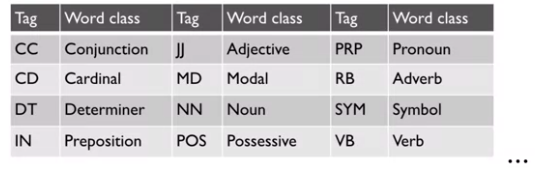

In [ ]:
import nltk
nltk.help.upenn_tagset('MD')

MD: modal auxiliary
    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would


**POS Tagging with NLTK**
- **Split** a **sentence** into **words**:

In [ ]:
text11 = "Children shouldn't drink a sugary drink before bed."
text11

"Children shouldn't drink a sugary drink before bed."

In [ ]:
text13 = nltk.word_tokenize(text11)
text13

['Children',
 'should',
 "n't",
 'drink',
 'a',
 'sugary',
 'drink',
 'before',
 'bed',
 '.']

- Use **NLTK built-in POS-tagger** on the tokenized words

In [ ]:
nltk.pos_tag(text13)

[('Children', 'NNP'),
 ('should', 'MD'),
 ("n't", 'RB'),
 ('drink', 'VB'),
 ('a', 'DT'),
 ('sugary', 'JJ'),
 ('drink', 'NN'),
 ('before', 'IN'),
 ('bed', 'NN'),
 ('.', '.')]

In [ ]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [ ]:
nltk.help.upenn_tagset('RB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...


- You can use these **POS tags** as **classes** to **cluster the text data**

**Ambiguity in POS Tagging**
- Ambiguity is very common in English: "*Visiting aunts can be a nuisance*"

In [ ]:
text14 = nltk.word_tokenize("Visiting aunts can be a nuisance")
text14

['Visiting', 'aunts', 'can', 'be', 'a', 'nuisance']

In [ ]:
nltk.pos_tag(text14) # "Visiting" gets interpreted as the verb 

[('Visiting', 'VBG'),
 ('aunts', 'NNS'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('nuisance', 'NN')]

Another alternative POS tagging would consider "*Visiting*" as the adjective of "*aunts*":
![image.png](attachment:a677998b-1625-495f-8452-80953cfa5af1.png)

NLTK gives only the first version of POS tagging for this particular sentence and not the second. This is based on the most common use of the words in large text corpus.

### **Parsing Sentence Structure**
- Making sense of sentences is easy if they follow a well-defined grammatical structure

In [ ]:
text15 = nltk.word_tokenize("Alice loves Bob")
text15

['Alice', 'loves', 'Bob']

In [ ]:
nltk.pos_tag(text15)

[('Alice', 'NNP'), ('loves', 'VBZ'), ('Bob', 'NNP')]

In [ ]:
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


In [ ]:
nltk.help.upenn_tagset('VBZ')

VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...


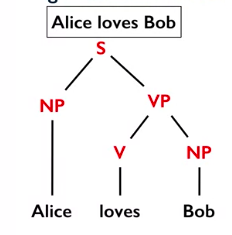

After having defined a **context-free grammar** (as tree above), you can use the **NLTK's contextual grammar input statements** to create a grammar that can be used to **parse the sentence**:

In [ ]:
text15 = nltk.word_tokenize("Alice loves Bob")
# S = sentence = NP + VP
# VP = Verb Phrase = V (+ NP)
# NP = Noun Phrase
# V = Verb

## set the grammar rules:
grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> V NP
NP -> 'Alice' | 'Bob'
V -> 'loves'
""")
print(grammar)
grammar

Grammar with 5 productions (start state = S)
    S -> NP VP
    VP -> V NP
    NP -> 'Alice'
    NP -> 'Bob'
    V -> 'loves'


<Grammar with 5 productions>

You then create a **parser** using the grammar just defined:

In [ ]:
parser = nltk.ChartParser(grammar)
parser

You can then use the parser to **parse the sentence**:

In [ ]:
trees = parser.parse_all(text15)
trees

[Tree('S', [Tree('NP', ['Alice']), Tree('VP', [Tree('V', ['loves']), Tree('NP', ['Bob'])])])]

In [ ]:
for tree in trees:
    print(tree)

(S (NP Alice) (VP (V loves) (NP Bob)))


**Ambiguity in Parsing**
- Ambiguity may exist even if sentences are grammatically correct

In [ ]:
# ambiguity in the preposition phrase attachment "with the telexcope"
text16 = nltk.word_tokenize("I saw the man with the telescope")
text16

['I', 'saw', 'the', 'man', 'with', 'the', 'telescope']

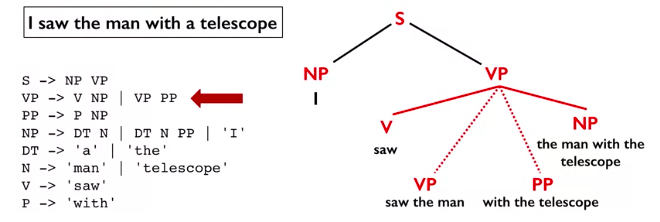

- The ambiguity is visualised using 2 trees that distinguish the 2 possible meanings of the sentence (continuous vs dotted line). PP = Preposition Phrase.
- We can try to parse this sentence with NLTK as well, using a grammar stored in a separate file:

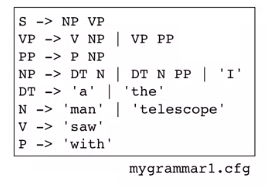

In [ ]:
grammar1 = nltk.data.load("mygrammar.cfg") 
grammar1 # the grammar has 13 rules (or productions)

<Grammar with 13 productions>

- we can then use **ChartParser** using the loaded grammar:

In [ ]:
parser = nltk.ChartParser(grammar1)
parser

In [ ]:
trees = parser.parse_all(text16)
for tree in trees:
    print(tree)

(S
  (NP I)
  (VP
    (VP (V saw) (NP (Det the) (N man)))
    (PP (P with) (NP (Det the) (N telescope)))))
(S
  (NP I)
  (VP
    (V saw)
    (NP (Det the) (N man) (PP (P with) (NP (Det the) (N telescope))))))


- Both two trees get generated

So far, the examples have involved simple grammars, however we might not be able to provide the grammar every time. 
- **Generating the grammar and its rules is a learning task itself which requires a lot of training data**.
- Also a lot of manual effort and time are required to create a **tree back** (i.e. a **big collection of parse trees**).
- Through NLTK we have access to a large collection of parse trees from the Wall Street Journal corpus.

In [ ]:
from nltk.corpus import treebank
text17 = treebank.parsed_sents('wsj_0001.mrg')[0] ## wsj = Wall Street Journal
print(text17)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


### **POS (Part Of Speech) Tagging & Parsing Complexity** 
- Uncommon usage of words (e.g. "*The old man the boat*")

In [ ]:
text18 = nltk.word_tokenize("The old man the boat")
nltk.pos_tag(text18) # it gives incorrectly 'man' as a noun rather than a verb!

[('The', 'DT'), ('old', 'JJ'), ('man', 'NN'), ('the', 'DT'), ('boat', 'NN')]

- Well-formed sentences may stiil be meaningless:

In [ ]:
text19 = nltk.word_tokenize("Colorless green ideas sleep furiously")
nltk.pos_tag(text19)
# sentence gets processed because its structure is right, 
# although it semantically is meaningless

[('Colorless', 'NNP'),
 ('green', 'JJ'),
 ('ideas', 'NNS'),
 ('sleep', 'VBP'),
 ('furiously', 'RB')]

There are many layers of complexity in language that parse trees and POS tags cannot address!

### **Take Home Concepts**
- **POS tagging** provides insights into the **word classes/types** in a **sentence**.
- **Parsing** the **grammatical structure** helps derive **meaning**.
- Both tasks are difficult, **linguistic ambiguity** increases the difficulty even more...
- **Better models** could be learned with **supervised learning**.
- **NLTK** provides **access to tools and data for training**.

## **Supplementary: Edit Distance and Jaccard Distance Calculation with NLTK** 
[see website](https://python.gotrained.com/nltk-edit-distance-jaccard-distance/)

### **S1.1: Edit Distance**
- **Edit Distance** (a.k.a. **Levenshtein Distance**) is a **measure of similarity between two strings** referred to as the **source string** and the **target string**.
- The **distance** between the source string and the target string is the **minimum number of edit operations** (**deletions**, **insertions**, or **substitutions**) required to **transform the source into the target**. The lower the distance, the more similar the two strings.
- Among the common applications of the Edit Distance algorithm are: spell checking, plagiarism detection, and translation memory systems.

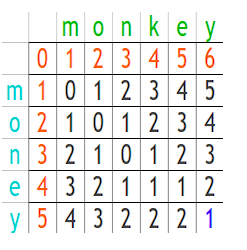


### **S1.2: Edit Distance Python NLTK**
NLTK library has the Edit Distance algorithm ready to use. Let’s take some examples.

**Example #1**: The output is 1 because the difference between “mapping” and “mappings” is only one character, “s”.


In [2]:
import nltk

w1 = 'mapping'
w2 = 'mappings'

nltk.edit_distance(w1, w2)


1

**Example #2**: **Basic Spelling Checker**. Let’s assume you have a mistaken word and a list of possible words and you want to know the nearest suggestion.

In [3]:
import nltk

mistake = "ligting"

words = ['apple', 'bag', 'drawing', 'listing', 'linking', 'living', 'lighting', 'orange', 'walking', 'zoo']

for word in words:
    ed = nltk.edit_distance(mistake, word)
    print(word, ed)


apple 7
bag 6
drawing 4
listing 1
linking 2
living 2
lighting 1
orange 6
walking 4
zoo 7


As you can see, comparing the mistaken word “ligting” to each word in our list, the **least Edit Distance** is 1 for words: “listing” and “lighting” which means they are the best spelling suggestions for “ligting”. Yes, **a smaller Edit Distance between two strings means they are more similar than others**.
- Bonus: You can have list of words from several sources, such as:
  - NLTK:  `words = nltk.corpus.words.words()`
  - Check [answers of this question](https://stackoverflow.com/questions/2213607/how-to-get-english-language-word-database).
  - Check [lists at Kaggle](https://www.kaggle.com/bittlingmayer/spelling).
  - Google: Search for “list of English words”.

**Example #3**: **Sentence or paragraph comparison** is useful in applications like **plagiarism detection** (to know if one article is a stolen version of another article), and **translation memory systems** (that save previously translated sentences and when there is a new untranslated sentence, the system retrieves a similar one that can be slightly edited by a human translator instead of translating the new sentence from scratch).

In [4]:
import nltk

sent1 = "It might help to re-install Python if possible."
sent2 = "It can help to install Python again if possible."
sent3 = "It can be so helpful to reinstall C++ if possible."
sent4 = "help It possible Python to re-install if might." # This has the same words as sent1 with a different order.
sent5 = "I love Python programming."

ed_sent_1_2 = nltk.edit_distance(sent1, sent2)
ed_sent_1_3 = nltk.edit_distance(sent1, sent3)
ed_sent_1_4 = nltk.edit_distance(sent1, sent4)
ed_sent_1_5 = nltk.edit_distance(sent1, sent5)


print(ed_sent_1_2, 'Edit Distance between sent1 and sent2')
print(ed_sent_1_3, 'Edit Distance between sent1 and sent3')
print(ed_sent_1_4, 'Edit Distance between sent1 and sent4')
print(ed_sent_1_5, 'Edit Distance between sent1 and sent5')


14 Edit Distance between sent1 and sent2
19 Edit Distance between sent1 and sent3
32 Edit Distance between sent1 and sent4
33 Edit Distance between sent1 and sent5


So it is clear that sent1 and sent2 are more similar to each other than other sentence pairs.

### **S2.1: Jaccard Distance**
- **Jaccard Distance** is a **measure of how dissimilar two sets are**.  The **lower the distance**, the **more similar the two strings**.
- Jaccard Distance depends on another concept called “**Jaccard Similarity Index**”:
$$Jaccard~Similarity~Index = 100 * \frac{number~in~both~sets}{number~in~either~set}$$

or:

$$J(X,Y) = \frac{|X \cap Y|}{|X \cup Y|}$$

Then we can calculate the **Jaccard Distance** as follows:

$$D(X,Y) = 1 - J(X,Y)$$

For example, if we have two strings: “mapping” and “mappings”, the intersection of the two sets is 6 because there are 7 similar characters, but the “p” is repeated while we need a **set**, i.e. **unique characters**, and the union of the two sets is 7, so the Jaccard Similarity Index is $6/7 = 0.857$ and the Jaccard Distance is $1 – 0.857 = 0.142$

### **S2.1: Jaccard Distance Python NLTK**
The good news is that the NLTK library has the Jaccard Distance algorithm ready to use. Let’s take some examples.

In [7]:
import nltk

w1 = set('mapping')
w2 = set('mappings')

nltk.jaccard_distance(w1, w2)



0.14285714285714285

Unlike Edit Distance, you cannot just run **Jaccard Distance** on the **strings** directly; you must first **convert them to the set type**.

**Example #2**: Basic Spelling Checker. It is the same example we had with the Edit Distance algorithm; now we are testing it with the Jaccard Distance algorithm. Let’s assume you have a mistaken word and a list of possible words and you want to know the nearest suggestion.

In [8]:
import nltk

mistake = "ligting"

words = ['apple', 'bag', 'drawing', 'listing', 'linking', 'living', 'lighting', 'orange', 'walking', 'zoo']

for word in words:
    jd = nltk.jaccard_distance(set(mistake), set(word))
    print(word, jd)


apple 0.875
bag 0.8571428571428571
drawing 0.6666666666666666
listing 0.16666666666666666
linking 0.3333333333333333
living 0.3333333333333333
lighting 0.16666666666666666
orange 0.7777777777777778
walking 0.5
zoo 1.0


Again, comparing the mistaken word “ligting” to each word in our list,  the least Jaccard Distance is 0.166 for words: “listing” and “lighting” which means they are the best spelling suggestions for “ligting” because they have the lowest distance.

**Example #3**: If you are wondering if there is a difference between the output of Edit Distance and Jaccard Distance, see this example.

In [10]:
import nltk

sent1 = set("It might help to re-install Python if possible.")
print(sent1)
sent2 = set("It can help to install Python again if possible.")
sent3 = set("It can be so helpful to reinstall C++ if possible.")
sent4 = set("help It possible Python to re-install if might.") # This has the same words as sent1 with a different order.
sent5 = set("I love Python programming.")

jd_sent_1_2 = nltk.jaccard_distance(sent1, sent2)
jd_sent_1_3 = nltk.jaccard_distance(sent1, sent3)
jd_sent_1_4 = nltk.jaccard_distance(sent1, sent4)
jd_sent_1_5 = nltk.jaccard_distance(sent1, sent5)


print(jd_sent_1_2, 'Jaccard Distance between sent1 and sent2')
print(jd_sent_1_3, 'Jaccard Distance between sent1 and sent3')
print(jd_sent_1_4, 'Jaccard Distance between sent1 and sent4')
print(jd_sent_1_5, 'Jaccard Distance between sent1 and sent5')


{'m', 'a', 'e', '-', 'r', 'o', 'f', 't', 'y', ' ', 'n', 'l', 'P', 'i', 'I', 'p', 's', 'h', 'g', '.', 'b'}
0.18181818181818182 Jaccard Distance between sent1 and sent2
0.36 Jaccard Distance between sent1 and sent3
0.0 Jaccard Distance between sent1 and sent4
0.22727272727272727 Jaccard Distance between sent1 and sent5


- Just like when we applied Edit Distance, sent1 and sent2 are the most similar sentences. However, look to the other results; they are completely different. 
- The most obvious difference is that the Edit Distance between sent1 and sent4 is 32 and the Jaccard Distance is zero, which means the Jaccard Distance algorithms sees them as identical sentence because **Edit Distance depends on counting edit operations from the start to end of the string** while **Jaccard Distance just counts the number characters and then apply some calculations on this number** as mentioned above. 
- Actually, there is no “right” or “wrong” answer; it all depends on what you really need to do.

### **S3.1: Tokenization**
If you want to work on **word level** instead of character level, you might want to **apply tokenization** first before calculating Edit Distance and Jaccard Distance. This can be useful if you want to exclude specific sort of tokens or if you want to run some pre-operations like lemmatization or stemming.

In [14]:
nltk.download('punkt')
sent = "It might help to re-install Python if possible."
tokens = nltk.word_tokenize(sent)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['It', 'might', 'help', 'to', 're-install', 'Python', 'if', 'possible', '.']

### **n-gram**
- In general, n-gram means **splitting a string in sequences with the length n**. So if we have this string “abcde”, then bigrams are: ab, bc, cd, and de while trigrams will be: abc, bcd, and cde while 4-grams will be abcd, and bcde.

- n-grams can be used with Jaccard Distance. n-grams per se are useful in other applications such as machine translation when you want to find out which phrase in one language usually comes as the translation of another phrase in the target language.

- Back to Jaccard Distance, let’s see how to use n-grams on the string directly, i.e. on the character level, or after tokenization, i.e. on the token level.

**Example #1: Character Level**

In [15]:
import nltk

sent1 = "It might help to re-install Python if possible."
sent2 = "It can help to install Python again if possible."
sent3 = "It can be so helpful to reinstall C++ if possible."
sent4 = "help It possible Python to re-install if might." # This has the same words as sent1 with a different order.
sent5 = "I love Python programming."


ng1_chars = set(nltk.ngrams(sent1, n=3))
print(ng1_chars)
ng2_chars = set(nltk.ngrams(sent2, n=3))
ng3_chars = set(nltk.ngrams(sent3, n=3))
ng4_chars = set(nltk.ngrams(sent4, n=3))
ng5_chars = set(nltk.ngrams(sent5, n=3))

jd_sent_1_2 = nltk.jaccard_distance(ng1_chars, ng2_chars)
jd_sent_1_3 = nltk.jaccard_distance(ng1_chars, ng3_chars)
jd_sent_1_4 = nltk.jaccard_distance(ng1_chars, ng4_chars)
jd_sent_1_5 = nltk.jaccard_distance(ng1_chars, ng5_chars)

print(jd_sent_1_2, "Jaccard Distance between sent1 and sent2 with ngram 3")
print(jd_sent_1_3, "Jaccard Distance between sent1 and sent3 with ngram 3")
print(jd_sent_1_4, "Jaccard Distance between sent1 and sent4 with ngram 3")
print(jd_sent_1_5, "Jaccard Distance between sent1 and sent5 with ngram 3")


{('t', ' ', 'h'), ('i', 'g', 'h'), (' ', 'm', 'i'), ('-', 'i', 'n'), (' ', 'r', 'e'), ('t', 'o', ' '), ('l', 'e', '.'), ('r', 'e', '-'), ('f', ' ', 'p'), ('s', 's', 'i'), ('s', 't', 'a'), ('o', 's', 's'), ('e', '-', 'i'), ('t', 'h', 'o'), ('i', 'f', ' '), ('l', 'p', ' '), ('m', 'i', 'g'), ('n', ' ', 'i'), ('p', ' ', 't'), ('h', 'o', 'n'), ('s', 'i', 'b'), ('I', 't', ' '), ('y', 't', 'h'), ('o', ' ', 'r'), ('l', 'l', ' '), (' ', 'p', 'o'), ('n', 's', 't'), (' ', 'i', 'f'), ('e', 'l', 'p'), ('i', 'b', 'l'), ('P', 'y', 't'), ('i', 'n', 's'), ('h', 't', ' '), ('g', 'h', 't'), ('t', ' ', 'm'), ('p', 'o', 's'), ('a', 'l', 'l'), ('l', ' ', 'P'), ('o', 'n', ' '), ('t', 'a', 'l'), ('b', 'l', 'e'), (' ', 't', 'o'), (' ', 'P', 'y'), (' ', 'h', 'e'), ('h', 'e', 'l')}
0.43103448275862066 Jaccard Distance between sent1 and sent2 with ngram 3
0.6323529411764706 Jaccard Distance between sent1 and sent3 with ngram 3
0.3333333333333333 Jaccard Distance between sent1 and sent4 with ngram 3
0.904761904761

Example #2: Token Level

In [17]:
import nltk

sent1 = "It might help to re-install Python if possible."
sent2 = "It can help to install Python again if possible."
sent3 = "It can be so helpful to reinstall C++ if possible."
sent4 = "help It possible Python to re-install if might." # This has the same words as sent1 with a different order.
sent5 = "I love Python programming."

tokens1 = nltk.word_tokenize(sent1)
tokens2 = nltk.word_tokenize(sent2)
tokens3 = nltk.word_tokenize(sent3)
tokens4 = nltk.word_tokenize(sent4)
tokens5 = nltk.word_tokenize(sent5)

ng1_tokens = set(nltk.ngrams(tokens1, n=3))
print(ng1_tokens)
ng2_tokens = set(nltk.ngrams(tokens2, n=3))
ng3_tokens = set(nltk.ngrams(tokens3, n=3))
ng4_tokens = set(nltk.ngrams(tokens4, n=3))
ng5_tokens = set(nltk.ngrams(tokens5, n=3))

jd_sent_1_2 = nltk.jaccard_distance(ng1_tokens, ng2_tokens)
jd_sent_1_3 = nltk.jaccard_distance(ng1_tokens, ng3_tokens)
jd_sent_1_4 = nltk.jaccard_distance(ng1_tokens, ng4_tokens)
jd_sent_1_5 = nltk.jaccard_distance(ng1_tokens, ng5_tokens)

print(jd_sent_1_2, "Jaccard Distance between tokens1 and tokens2 with ngram 3")
print(jd_sent_1_3, "Jaccard Distance between tokens1 and tokens3 with ngram 3")
print(jd_sent_1_4, "Jaccard Distance between tokens1 and tokens4 with ngram 3")
print(jd_sent_1_5, "Jaccard Distance between tokens1 and tokens5 with ngram 3")


{('might', 'help', 'to'), ('if', 'possible', '.'), ('help', 'to', 're-install'), ('It', 'might', 'help'), ('Python', 'if', 'possible'), ('to', 're-install', 'Python'), ('re-install', 'Python', 'if')}
0.9285714285714286 Jaccard Distance between tokens1 and tokens2 with ngram 3
0.9333333333333333 Jaccard Distance between tokens1 and tokens3 with ngram 3
1.0 Jaccard Distance between tokens1 and tokens4 with ngram 3
1.0 Jaccard Distance between tokens1 and tokens5 with ngram 3
